In [1]:
import pandas as pd
from datetime import datetime 

import os

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar warings
import warnings
warnings.filterwarnings("ignore")

import dotenv
from dotenv import load_dotenv
load_dotenv()

import psycopg2
from psycopg2 import sql
pd.set_option('display.max_columns', None)

import sys 
sys.path.append(os.path.abspath("../src"))   


import funciones as f

In [2]:
df_wallapop=pd.read_csv("../datos/datos_wallapop.csv", index_col= "Unnamed: 0" )
df_seguridad=pd.read_csv("../datos/datos_seguridad.csv", index_col= "Unnamed: 0" )
df_datos_modelos_nuevos=pd.read_csv("../datos/datos_modelos_nuevos.csv", index_col= "Unnamed: 0" )
df_segunda_mano=pd.read_csv("../datos/datos_segunda_mano.csv", index_col= "Unnamed: 0")

**DATOS DE LOS DESCRIBED** (Se hieron una vez estaban ya creadas las tablas (con ids insertados)) 
  
WALLAPOP:  
  
- Precio: 
Se observa como la media es superior a la mediana en 500 € indicando un alto número de valores (atipicos) en precios altos.Su mínimo valor es 2200€ mientras que su máximo es 11500€.  

  
- También obtemos que la ciudad más común de Madrid desde donde se venden coches de segunda mano por wallapop es Galapagar con un afrecuencia de 2 (Debido al peque número de muestras).  



SEGUNDA MANO: 

- Precio:   
Nos percatamos de que de nuevo, al igual que pasaba en Wallapop, la media del precio está sesgada hacia valores superiores a la mediana (en este caso la diferencia entre media y mediana es de casi 2000€).Su mínimo valor es 1200€ mientras que su máximo es 145000€(lo que corresponde al Nissan GT).

- Kilometraje:  
La diferencia entre media y mediana nos muestra que hay algunos coches con mucho kilometraje como podemos confirmar observando como auentan exponencialmente la diferencia entre los cuartiles.  
  
- Versión:  
La más repetida es la versión  "Nissan Micra IG-T Acenta 92" que se repite un total de 26 veces.  
  
  
    
MODELOS NUEVOS:  
  
- Puertas:  
Observamos como en el mercado actual de vehículos Nissan, La gran mayoría de coches cuentan con 5 puertas. 

- Consumo:  
Debido a que se juntaron la autonomía de los coches eléctrico en el consumo de los vehiculos de carburante, No podremos sacar más conclusiones a parte de que el coche con consumo mínimo consume 4,7 a los 100km lo que probablemente indique que sea un híbrido y que el modelo eléctrico con mayor autonomía tiene una autonomía máxima de 536Km.  

- Precio:  
Observamos como era de esperar que los precios de los modelos nuevos es mucho más alto que los de segunda mano. Además, a pesar de que la desviación entre media y mediana es de 2000€ teniendo en cuenta los cuartiles y el máximo, Parece que podríamos concluir que Nissan cuenta con bastantes modelos de un mismo rango de precio y a su vez ofrece algunos (pocos) muy por encima del rango de precio habitual.  
   


SEGURIDAD:  

- Evaluación general: 
La media es de 4.41, ligeramente superior a la mediana (4.00) unido a que ya en el primer cuartil se obtiene el valor 4, lo cual muestra una tendencia hacia evaluaciones favorables en general, con una puntuación máxima de 5 y una mínima de 2.

- Evaluación Choque frontal y Choque lateral:  
Tienen medias de 3.91 y 4.92 respectivamente, indicando buenas evaluaciones en estos aspectos. La mediana de 4 en el choque frontal demuestra puntuaciones estables, mientras que el choque lateral es bastante alto con una mediana y un 75% de 5.  


- Evaluación de barrera lateral y Choque columna:   
Ambas tienen medias de 4.83, manteniéndose altas con valores que se concentran en los niveles superiores.  


- Vuelco:  
Presenta una media de 4.03, con una desviación estándar baja, lo que indica una evaluación con consistencia en esta categoría.

- Probabilidad vuelco:    
La probabilidad media de vuelco es baja (0.15), con un valor mínimo de 0.092 y un máximo de 0.237. La desviación estándar de 0.04 nos permite afirmar que hay una baja probabilidad de vuelco.  

- Quejas:   
La media es de 135, pero hay una gran dispersión (desviación estándar de 227), lo cual sugiere que existe un pequeño número de vehículos con un alto número de quejas, siendo el valor máximo 2263 quejas. Esto puede estar unido al número de modelos retirados del mercado.

- Retiradas:   
La media es de 2.72. Aunque el 75% de los modelos retirados no superan las 4, existe un valor máximo de 12, lo cual muestra algunos modelos con mayor número de retiradas.  

- Investigaciones:   
La mayoría de los vehículos no tienen investigaciones (mediana 0), pero el valor máximo es 7, indicando que algunos modelos han sido objeto de análisis detallado.Lo que también puede estar correlacionado con tanto las quejas como las retiradas.  



- Equipamiento de seguridad:   
Los distintos tipos de equipamientos, muestran una media cercana a 1, sugiriendo que en muchos modelos estos equipamientos están disponibles de manera estándar. La mediana es 1 para todos estos equipamientos, salvo el aviso de desvío de carril, que tiene una media y mediana de 2, indicando una presencia más baja en los modelos.  

  
- Versión:  
La versión más evaluada fue el Nissan Rogue con 36 evaluaciones de seguridad.  








  


In [ ]:
df_wallapop.describe().T

,count,mean,std,min,25%,50%,75%,max
id_wallapop,7.0,4.000000,2.160247,1.000000,2.500000,4.000000,5.500000,7.000000
precio,7.0,7014.285714,3162.108248,2200.000000,5475.000000,6500.000000,8975.000000,11500.000000
latitud,7.0,40.493661,0.110262,40.301646,40.443107,40.494190,40.576660,40.620256
longitud,7.0,-3.785559,0.245586,-4.001960,-3.981749,-3.910636,-3.590496,-3.441828
id_provincia,7.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_wallapop.describe(include="O").T

,count,unique,top,freq
descripcion,7,7,nisan almera tino del 2004 ba por cadena le ve...,1
ciudad,7,6,Galapagar,2


In [ ]:
df_segunda_mano.describe().T

,count,mean,std,min,25%,50%,75%,max
id_segunda_mano,358.0,220.622905,121.583438,1.0,115.25,229.5,323.75,419.0
kilometraje,358.0,79468.977654,63303.986057,10.0,32472.00,61997.5,115000.00,360000.0
precio,358.0,15365.720670,10026.031475,1200.0,11190.00,13597.5,17999.75,145000.0
id_provincia,358.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
id_potencia,358.0,15.251397,10.453763,1.0,4.00,18.0,22.00,43.0
id_motor,358.0,4.296089,1.545405,3.0,3.00,3.0,6.00,7.0
id_cambio,358.0,1.220670,0.415279,1.0,1.00,1.0,1.00,2.0
id_anio,358.0,9.745810,4.007650,1.0,7.00,10.0,13.00,24.0


In [ ]:
df_segunda_mano.describe(include="O").T

,count,unique,top,freq
version,358,190,Nissan Micra IG-T Acenta 92,26


In [ ]:
df_datos_modelos_nuevos.describe().T

,count,mean,std,min,25%,50%,75%,max
id_modelo_nuevo,107.0,56.093458,32.781303,1.0,27.50,58.0,84.50,111.0
puertas,107.0,4.700935,0.661829,2.0,5.00,5.0,5.00,5.0
consumo,107.0,79.287850,163.273743,4.7,5.95,6.9,7.25,536.0
precio,107.0,44394.644860,22717.142912,25275.0,34975.00,42141.0,45839.00,220290.0
id_provincia,107.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
id_potencia,107.0,8.252336,4.662361,1.0,4.00,8.0,12.50,17.0
id_motor,107.0,2.953271,1.383073,1.0,2.00,3.0,4.00,5.0
id_modelo,107.0,6.242991,3.400447,1.0,3.00,6.0,9.00,12.0
id_anio,107.0,14.000000,0.000000,14.0,14.00,14.0,14.00,14.0


In [ ]:
df_datos_modelos_nuevos.describe(include="O").T

,count,unique,top,freq
version,107,107,NISSAN QASHQAI 1.3 DIG-T MHEV 103KW (140CV) AC...,1


In [ ]:
df_seguridad.describe().T

,count,mean,std,min,25%,50%,75%,max
id_seguridad,249.0,125.000000,72.024301,1.000,63.00,125.000,187.000,249.000
evaluacion_general,249.0,4.409639,0.539627,2.000,4.00,4.000,5.000,5.000
evaluacion_choque_frontal,249.0,3.911647,0.539026,3.000,4.00,4.000,4.000,5.000
evaluacion_choque_lateral,249.0,4.915663,0.376898,2.000,5.00,5.000,5.000,5.000
evaluacion_barrera_lateral,249.0,4.831325,0.487405,2.000,5.00,5.000,5.000,5.000
evaluacion_vuelco,249.0,4.032129,0.490815,3.000,4.00,4.000,4.000,5.000
probabilidad_vuelco,249.0,0.154096,0.039920,0.092,0.11,0.159,0.179,0.237
evaluacion_choque_columna,249.0,4.827309,0.437986,2.000,5.00,5.000,5.000,5.000
quejas,249.0,135.281124,227.877817,0.000,10.00,52.000,156.000,2263.000
retiradas,249.0,2.718876,2.921225,0.000,0.00,2.000,4.000,12.000


In [ ]:
df_seguridad.describe(include="O").T

,count,unique,top,freq
marca,249,1,NISSAN,249
version,249,27,ROGUE,36
descripcion,249,249,2011 Nissan Altima 4 DR FWD,1


In [3]:
key= os.getenv("key")

In [4]:
f.crear_basedatos("localhost","postgres",key,"5432","Vehiculos")

Error de tipo: la base de datos «Vehiculos» ya existe



In [5]:
f.iniciar_conexion("localhost","postgres",key,"5432","Vehiculos")

No he encontrado la manera para que fuuncionara sin esto aquí

In [6]:
conexion = psycopg2.connect(
    database= "Vehiculos",
    host="localhost",       
    user="postgres",      
    password=key, 
    port="5432"            
)

De aquí en adelante sacar visualizaciones

In [12]:
df_seguridad.head(1)

,id_seguridad,evaluacion_general,evaluacion_choque_frontal,evaluacion_choque_lateral,evaluacion_barrera_lateral,evaluacion_vuelco,probabilidad_vuelco,evaluacion_choque_columna,quejas,retiradas,investigaciones,marca,version,descripcion,vehiculo_id,id_anio,id_equipamiento_aviso_choque_front,id_equipamiento_aviso_desvio_carril,id_equipamiento_estabilidad_electronica
0,1,4,4,5,4,4,0.105,5,236,1,0,NISSAN,ALTIMA,2011 Nissan Altima 4 DR FWD,357,1,3,3,1


Text(0, 0.5, 'Quejas')

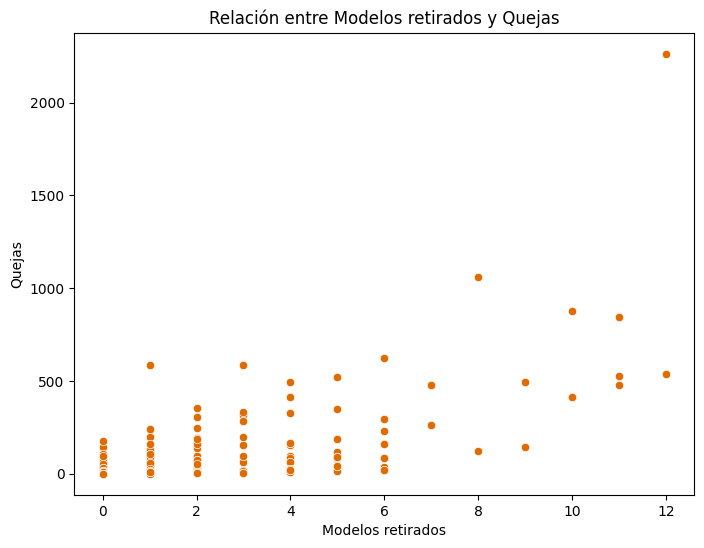

In [147]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="retiradas", y= "quejas", data=df_seguridad,color="#E06B00" )
plt.title("Relación entre Modelos retirados y Quejas")
plt.xlabel("Modelos retirados")
plt.ylabel("Quejas")

Text(0, 0.5, 'Investigaciones')

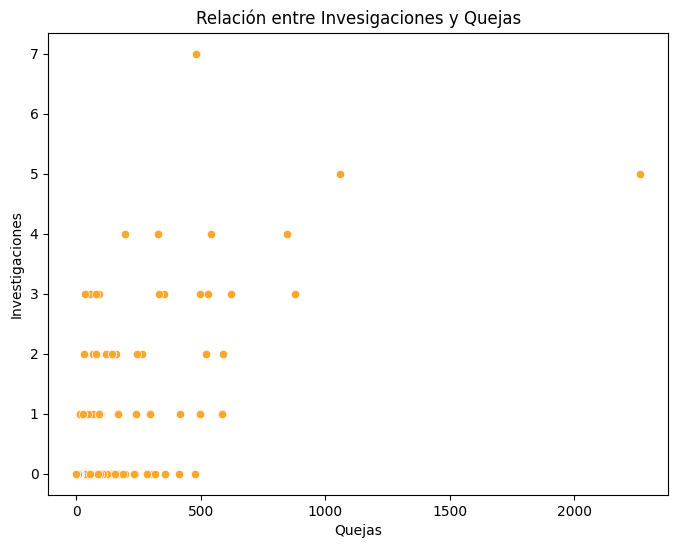

In [146]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="quejas", y= "investigaciones", data=df_seguridad, color="#FAA72D" )
plt.title("Relación entre Invesigaciones y Quejas")
plt.xlabel("Quejas")
plt.ylabel("Investigaciones")

In [34]:
cursor=conexion.cursor()
query_anio_retiradas="""
SELECT a.anio ,s.retiradas
FROM anios a 
INNER JOIN seguridad s ON a.id_anio = s.id_anio
"""
cursor.execute(query_anio_retiradas)
df_anio_retiradas= pd.DataFrame(cursor.fetchall())

In [35]:
df_anio_retiradas.head(2)

,0,1
0,2011,1
1,2011,1


Text(0, 0.5, 'Modelos retirados')

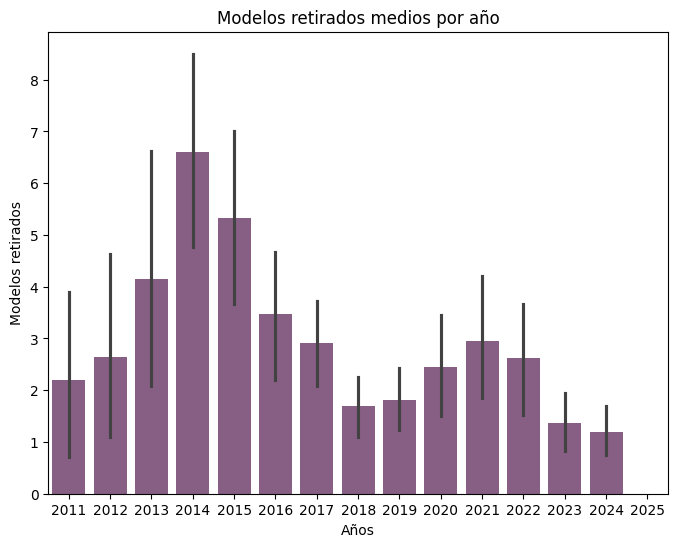

In [108]:
plt.figure(figsize=(8,6))
sns.barplot(x=0,y= 1, data=df_anio_retiradas, color="#8E588B" )
plt.title("Modelos retirados medios por año")
plt.xlabel("Años")
plt.ylabel("Modelos retirados")

In [39]:
cursor=conexion.cursor()
query_anio_quejas="""
SELECT a.anio ,s.quejas
FROM anios a 
INNER JOIN seguridad s ON a.id_anio = s.id_anio
"""
cursor.execute(query_anio_quejas)
df_anio_quejas= pd.DataFrame(cursor.fetchall())

In [40]:
df_anio_quejas.head(2)

,0,1
0,2011,236
1,2011,240


Text(0, 0.5, 'Quejas')

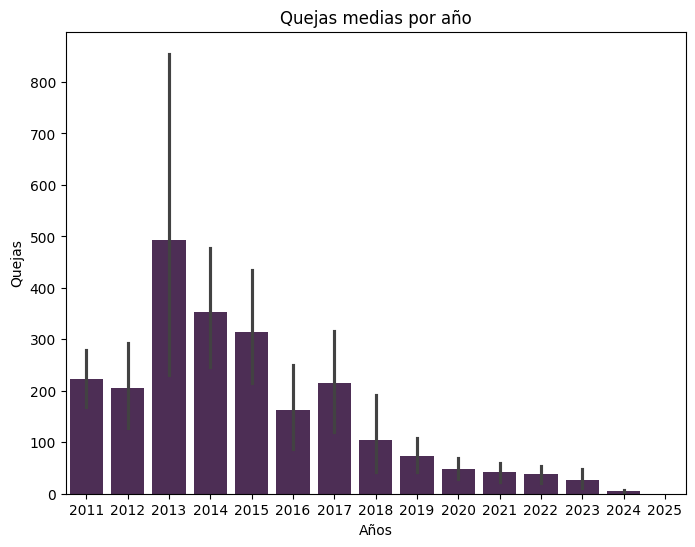

In [109]:
plt.figure(figsize=(8,6))
sns.barplot(x=0,y= 1, data=df_anio_quejas, color="#51275C" )
plt.title("Quejas medias por año")
plt.xlabel("Años")
plt.ylabel("Quejas")

In [86]:
cursor=conexion.cursor()
query_comparacion_precios="""
SELECT w.precio ,sm.precio , mn.precio 
FROM provincias p 
INNER JOIN wallapop w ON p.id_provincia = w.id_provincia
INNER JOIN modelos_nuevos mn ON p.id_provincia = mn.id_provincia
INNER JOIN segunda_mano sm ON p.id_provincia = sm.id_provincia
"""
cursor.execute(query_comparacion_precios)
df_comparacion_precios= pd.DataFrame(cursor.fetchall(),columns=['Wallapop', 'Segunda Mano', 'Modelos Nuevos'])

In [ ]:
df_comparacion_precios
df_melted = df_comparacion_precios.melt(var_name='Categoria', value_name='Precio')  #da formato largo en vez de formato ancho


In [87]:
precio_medios = df_comparacion_precios.mean()
df_precios = pd.DataFrame({
    'Categoria': precio_medios.index,
    'Precio Medio': precio_medios.values
})


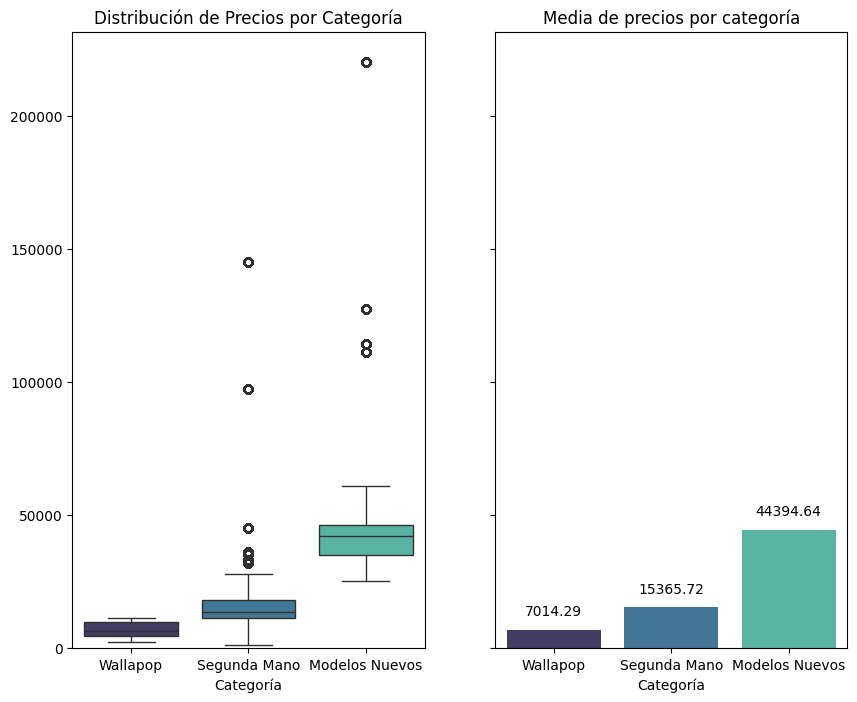

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

sns.boxplot(ax=axes[0], x='Categoria', y='Precio', data=df_melted, palette="mako")
axes[0].set_title("Distribución de Precios por Categoría")
axes[0].set_xlabel("Categoría")
axes[0].set_ylabel("")


sns.barplot(ax=axes[1], x='Categoria', y='Precio Medio', data=df_precios, palette="mako")
axes[1].set_title("Media de precios por categoría")
axes[1].set_xlabel("Categoría")
axes[1].set_ylabel("Precio Medio (€)")
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.2f",  padding=8) 



In [127]:
cursor=conexion.cursor()
query_potencia_segunda="""

SELECT p.potencia , sm."version"
FROM potencias p 
INNER JOIN segunda_mano sm ON p.id_potencia = sm.id_potencia

"""
cursor.execute(query_potencia_segunda)
df_potencia_segunda= pd.DataFrame(cursor.fetchall())

In [128]:
potencia_media_segunda_mano=df_potencia_segunda[0].mean()

In [129]:
cursor=conexion.cursor()
query_potencia_nuevo="""

SELECT p.potencia , mn."version"
FROM potencias p 
INNER JOIN modelos_nuevos mn ON p.id_potencia = mn.id_potencia


"""
cursor.execute(query_potencia_nuevo)
df_potencia_nuevo= pd.DataFrame(cursor.fetchall())

In [130]:
potencia_media_nuevos=df_potencia_nuevo[0].mean()

In [131]:

df_potencia_media = pd.DataFrame({
    'Categoria': ['Coches Nuevos', 'Coches de Segunda Mano'],
    'Potencia Media': [potencia_media_nuevos, potencia_media_segunda_mano]
})


df_combined = pd.concat([df_datos_modelos_nuevos.assign(Categoria='Coches Nuevos'),
                         df_segunda_mano.assign(Categoria='Coches de Segunda Mano')])


Text(0, 0.5, 'Potencia Media')

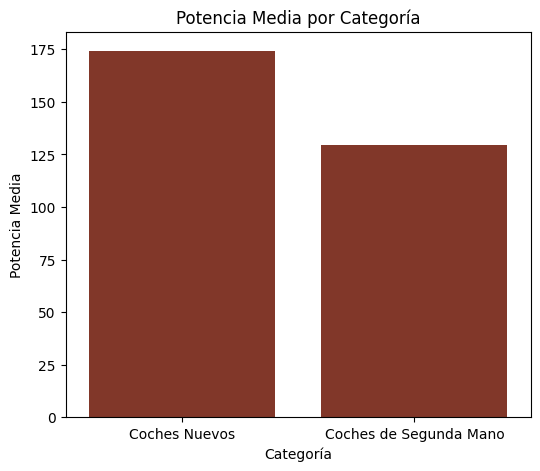

In [168]:
plt.figure(figsize=(6,5))
sns.barplot( x='Categoria', y='Potencia Media', data=df_potencia_media, color="#8F2D1B")
plt.title("Potencia Media por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Potencia Media")


In [71]:
cursor=conexion.cursor()
query_numero_motores="""
SELECT m."motor" , id_modelo_nuevo , id_segunda_mano 
FROM motores m 
INNER JOIN segunda_mano sm ON m.id_motor = sm.id_motor
INNER JOIN modelos_nuevos mn ON m.id_motor = mn.id_motor
"""
cursor.execute(query_numero_motores)
df_numero_motores= pd.DataFrame(cursor.fetchall())

In [73]:
df_numero_motores.head(2)

,0,1,2
0,Gasolina,111,1
1,Gasolina,110,1


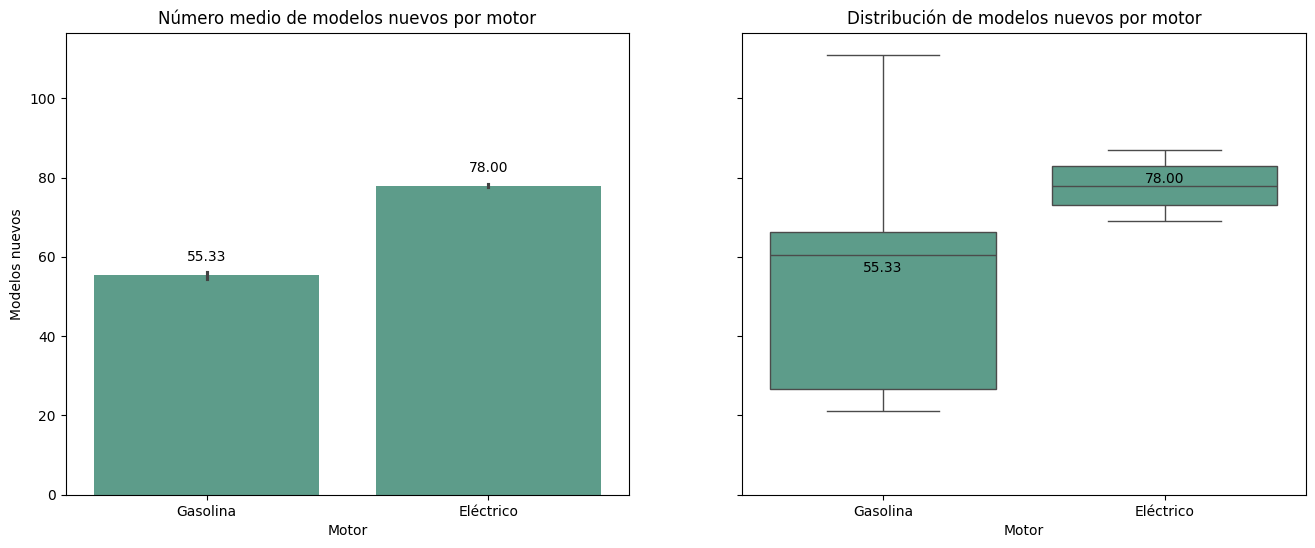

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


sns.barplot(ax=axes[0], x=0, y=1, data=df_numero_motores, color="#53A68E")
axes[0].set_title("Número medio de modelos nuevos por motor")
axes[0].set_xlabel("Motor")
axes[0].set_ylabel("Modelos nuevos")
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.2f",  padding=8) 

sns.boxplot(ax=axes[1], x=0, y=1, data=df_numero_motores, color="#53A68E")
axes[1].set_title("Distribución de modelos nuevos por motor")
axes[1].set_xlabel("Motor")
axes[1].set_ylabel("Modelos nuevos")
for container in axes[0].containers:
    axes[1].bar_label(container, fmt="%.2f") 




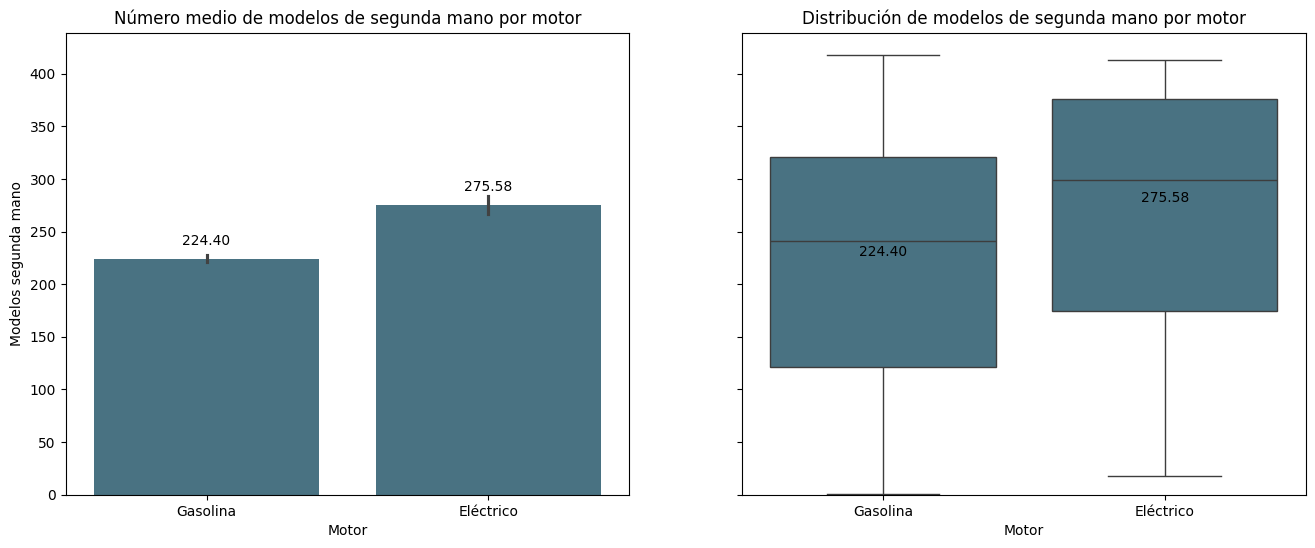

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


sns.barplot(ax=axes[0], x=0, y=2, data=df_numero_motores, color="#3F768C" )
axes[0].set_title("Número medio de modelos de segunda mano por motor")
axes[0].set_xlabel("Motor")
axes[0].set_ylabel("Modelos segunda mano")
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.2f",  padding=8) 


sns.boxplot(ax=axes[1], x=0, y=2, data=df_numero_motores, color="#3F768C" )
axes[1].set_title("Distribución de modelos de segunda mano por motor")
axes[1].set_xlabel("Motor")
axes[1].set_ylabel("Modelos segunda mano")
for container in axes[0].containers:
    axes[1].bar_label(container, fmt="%.2f") 